Google App Ratings Exercise

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import linear regression
from sklearn.linear_model import LinearRegression

Read Data

In [2]:
google_data=pd.read_csv("../Downloads/GoogleRating/GoogleRating/googleplaystore.csv")
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
google_data.shape


(10841, 13)

In [4]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


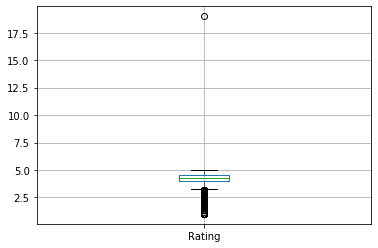

In [5]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a461d10>]],
      dtype=object)

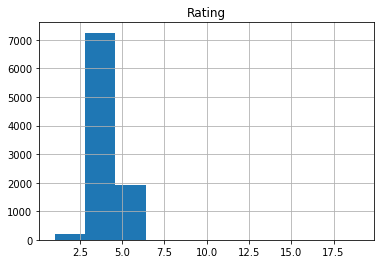

In [6]:
google_data.hist()

In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


DATA CLEANING

In [8]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Check how many ratings are more than 5(OUTLIERS)

In [9]:
google_data[google_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
google_data.drop([10472],inplace=True)

In [11]:
google_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


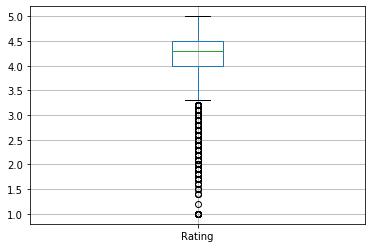

In [12]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1aad8f50>]],
      dtype=object)

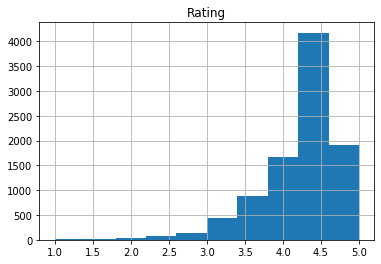

In [13]:
google_data.hist()

Remove cells that are 90% empty

In [14]:
threshold=len(google_data)* 0.1
threshold


1084.0

In [15]:
google_data.dropna(thresh=threshold ,axis=1 ,inplace=True)

In [16]:
print(google_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


Data Manipulation

In [17]:
def impute_median(series):
    return series.fillna(series.median)
    

In [18]:
google_data.Rating=google_data['Rating'].transform(impute_median)

In [19]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


fill the missing categorical values with mode

In [21]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace=True)


In [22]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
google_data['Price']=google_data['Price'].apply(lambda x: str(x).replace('$'," ") if '$' in str(x) else str(x))
google_data['Price']=google_data['Price'].apply(lambda x:float(x))
google_data['Reviews']=pd.to_numeric(google_data['Reviews'], errors="coerce")

In [24]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
#google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [ ]:
google_data.head()

In [31]:
google_data.describe()

,Reviews,Price
count,1.084000e+04,10840.000000
mean,4.441529e+05,1.027368
std,2.927761e+06,15.949703
min,0.000000e+00,0.000000
25%,3.800000e+01,0.000000
50%,2.094000e+03,0.000000
75%,5.477550e+04,0.000000
max,7.815831e+07,400.000000


DATA VISUALISATION

In [42]:
grp = google_data.groupby('Category')
#x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

print(y)
print(z)

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

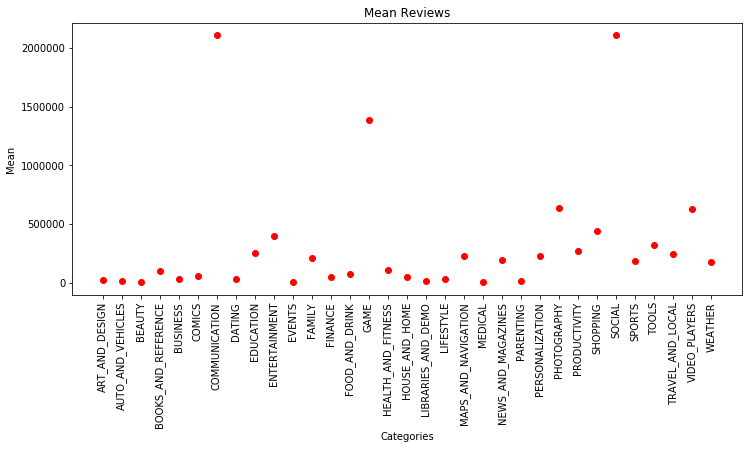

In [56]:
plt.figure(figsize=(12,5))
plt.plot(z,'ro')
plt.xticks(rotation=90)

plt.title('Mean Reviews')
plt.ylabel('Mean ')
plt.xlabel('Categories')
plt.show()